In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("husainaliarif/Covid19")
df = dataset["train"].to_pandas()

In [2]:
df_GR = df[(df["continent"] == "Europe") & (df["location"] == "Greece")].copy()
df_GR["cases_7d"] = df_GR["new_cases"].rolling(7).mean()

df_GR["date"] = pd.to_datetime(df_GR["date"])
df_GR = df_GR.sort_values(by="date")
df_7d = df_GR[["date", "cases_7d"]]
df_7d = df_7d.set_index("date").dropna()

df_7d

,cases_7d
date,
2020-03-03,1.000000
2020-03-04,1.142857
2020-03-05,4.000000
2020-03-06,5.857143
2020-03-07,6.000000
...,...
2021-06-25,369.857143
2021-06-26,367.857143
2021-06-27,366.142857


In [3]:
test_set = df_7d.tail(30)
training_test = df_7d.iloc[:-30]

In [8]:
test_set["month_num"] = test_set.index.month.copy()
test_set = test_set.sort_values(by="month_num")
test_set["month"] = test_set["month_num"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))
training_test = training_test["cases_7d"]
training_test = training_test.to_frame()  
training_test["month_num"] = training_test.index.month
training_test = training_test.sort_values(by="month_num")
training_test["month"] = training_test["month_num"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

In [9]:
df_7d["month"] = df_7d.index.month

monthly_avg = df_7d.groupby("month")["cases_7d"].mean()



In [10]:
monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df.columns = ["month", "cases_7d"]

monthly_avg_df["month"] = monthly_avg_df["month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))


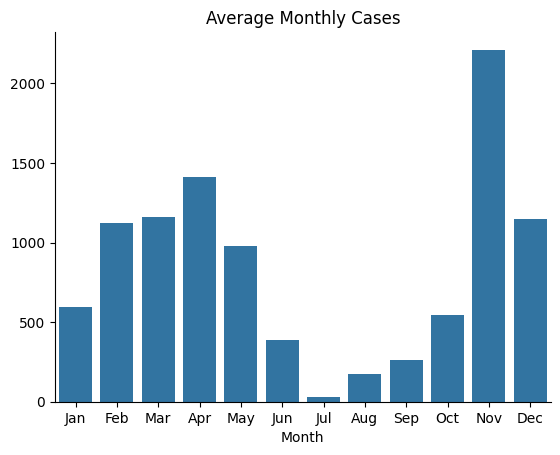

In [11]:
sns.barplot(data=monthly_avg_df, x="month", y="cases_7d")
sns.despine()
plt.title("Average Monthly Cases")
plt.xlabel("Month")
plt.ylabel("")
plt.show()

In [183]:
training_test_avg = training_test.groupby("month_num")["cases_7d"].mean()
training_test_avg = training_test_avg.reset_index()
training_test_avg = training_test_avg.sort_values(by="month_num")
training_test_avg["month"] = training_test_avg["month_num"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

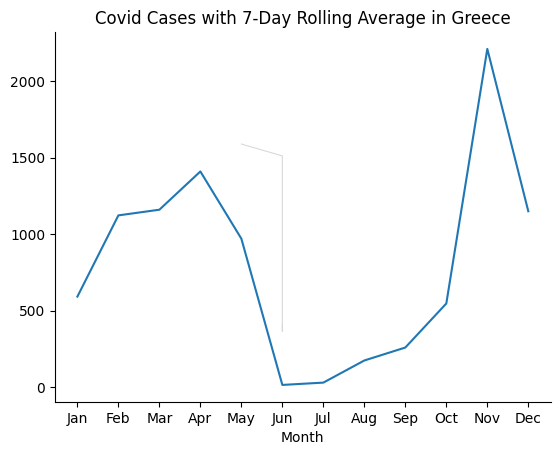

In [184]:
sns.lineplot(data=training_test_avg, x="month", y="cases_7d")
sns.despine()
plt.title("Covid Cases with 7-Day Rolling Average in Greece")
plt.xlabel("Month")
plt.ylabel("")
plt.plot(test_set["month"], test_set["cases_7d"], color="grey", linewidth=0.8, alpha=0.3)
plt.show()